In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
RANDOM_STATE = 42

#X, y = load_wine(return_X_y=True)
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))
print('''Number of labels: {}'''.format(len(set(y))))

pd.DataFrame(X, columns=feature_names).head()

Number of samples: 178
Number of features: 13
Number of labels: 3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Train a classification model to check to evaluate the loss of information

Accuracy for a classifier using the original dataset:  0.9555555555555556


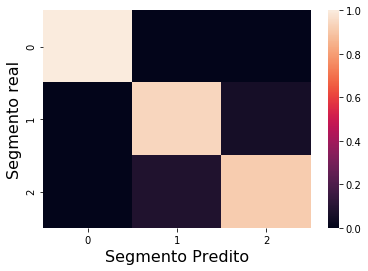

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the original dataset: ', acc)

#feature_importances = dict(zip(feature_names, rfc.feature_importances_))
#[print('''Feature importance of {}: {}'''.format(feat, feature_importances[feat])) for feat in feature_importances]

cm = confusion_matrix(y_pred,y_test,normalize='true')
plt.figure(figsize=(6,4))
ax = sns.heatmap(cm)
ax.set_xlabel("Segmento Predito",fontdict={"fontsize":16})
ax.set_ylabel("Segmento real",fontdict={"fontsize":16})
sns.set(font_scale = 1.5)

# General inputs of dimensionality reduction models

In [4]:
n_components = 2
n_components_PCA_TSNE = 7
n_layers_AE = [n_components_PCA_TSNE, n_components, n_components_PCA_TSNE]

# Dimensionality reduction using t-SNE and PCA

### Dimensionality reduction using t-SNE and PCA without data scaling

t-SNE:
Sum of the Kullback-Leiber divergences for 2 principal components: 0.9222598150372505
Accuracy for a classifier using the reduced dataset:  0.8


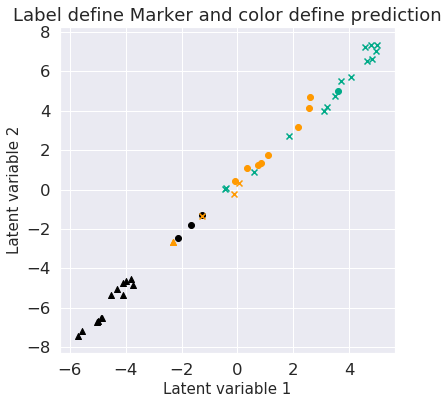

In [5]:
# ===========================================================================================
# Applying dimensionality reduction in the raw data using # t-SNE
# Notes:
# 1. t-SNE has no method transform. So, I'm applying the dimensionality reduction before 
#    split the data into train and test. This only makes sense when you will not apply the 
#    modeling for new data.
# 2. PCA has the method transform. However, to keep consistency in the comparative analisys 
#    with t-SNES, I'm following the same approach of applying the dimensionality reduction 
#    before split the data into train and test. This only makes sense when you will not apply 
#    the modeling for new data.
# ===========================================================================================

# t-SNE

print('t-SNE:')

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X)

print('''Sum of the Kullback-Leiber divergences for {} principal components: {}'''
      .format(X_tsne.shape[1], 1-tsne.kl_divergence_))

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA:
Cumulative explained variation for 2 principal components: 0.9998271461166032
Accuracy for a classifier using the reduced dataset:  0.7333333333333333


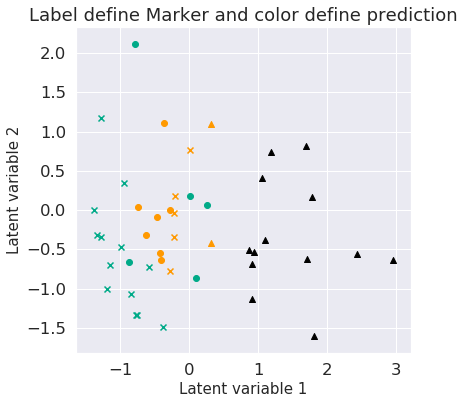

In [6]:
# ===========================================================================================
# Applying dimensionality reduction in the raw data using # t-SNE
# Notes:
# 1. t-SNE has no method transform. So, I'm applying the dimensionality reduction before 
#    split the data into train and test. This only makes sense when you will not apply the 
#    modeling for new data.
# 2. PCA has the method transform. However, to keep consistency in the comparative analisys 
#    with t-SNES, I'm following the same approach of applying the dimensionality reduction 
#    before split the data into train and test. This only makes sense when you will not apply 
#    the modeling for new data.
# ===========================================================================================

# PCA

print('PCA:')

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

print('''Cumulative explained variation for {} principal components: {}'''
      .format(X_pca.shape[1], np.sum(pca.explained_variance_ratio_)))

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

### Dimensionality reduction using t-SNE and PCA with data scaling

t-SNE:
Accuracy for a classifier using the reduced dataset:  0.9555555555555556


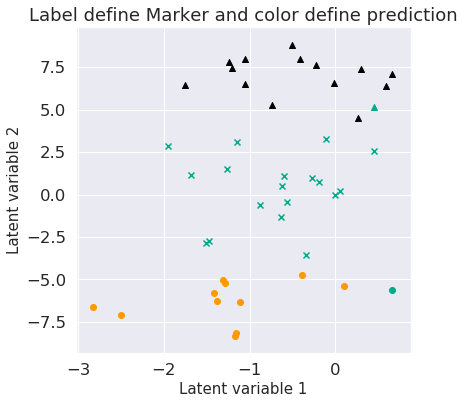

In [7]:
# ===========================================================================================
# Scaling features before of dimensionality reduction
# Approach suggested in Scikit-learning page: Importance of Feature Scaling
# Link: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#importance-of-feature-scaling
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

# t-SNE

print('t-SNE:')

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA:
Accuracy for a classifier using the reduced dataset:  0.9555555555555556


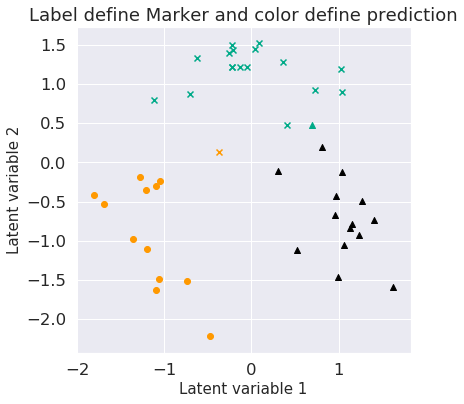

In [8]:
# ===========================================================================================
# Scaling features before of dimensionality reduction
# Approach suggested in Scikit-learning page: Importance of Feature Scaling
# Link: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#importance-of-feature-scaling
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

# PCA

print('PCA:')

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

PCA + t-SNE:
Accuracy for a classifier using the reduced dataset:  1.0


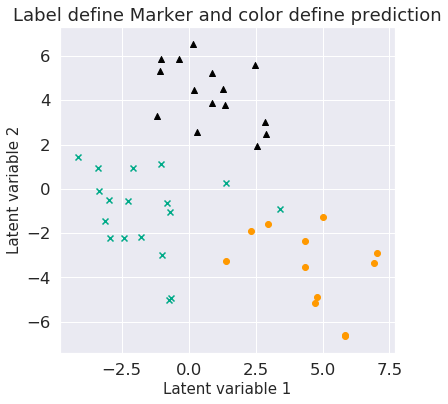

In [9]:
# ===========================================================================================
# Scaling features before of dimensionality reduction + Reducing the number of dimensions 
# before feeding the data into the t-SNE algorithm. Let's use PCA to this first reduction.
# Approach suggested in Scikit-learn page: sklearn.manifold.TSNE
#      It is highly recommended to use another dimensionality reduction method (e.g. PCA 
#      for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions 
#      to a reasonable amount (e.g. 50) if the number of features is very high. This will 
#      suppress some noise and speed up the computation of pairwise distances between samples.
# Link: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold
# ===========================================================================================

# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

print('PCA + t-SNE:')

pca = PCA(n_components=n_components_PCA_TSNE, whiten=True, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=n_components,perplexity=50,learning_rate=100,n_iter=1000,metric="euclidean", random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

### Dimensionality reduction using a complete pipeline
Pipeline with SS, PCA and RFC, training with train data and fitting with test data

Accuracy using a pipeline for scaling, dimensionality reduction and classfication:  0.9777777777777777


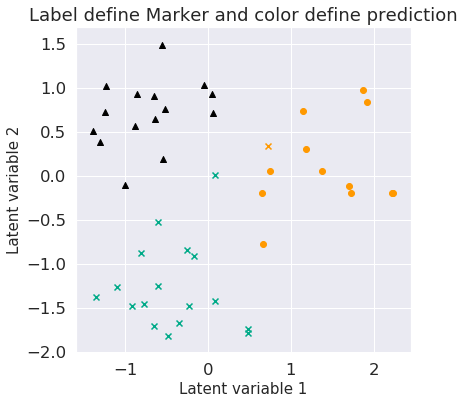

In [10]:
# ===========================================================================================
# Solving the problem of using the whole dataset to scale and reduce dimension.
# Additionally, it is used pipeline to make clear the entire process for:
#   - Scaling
#   - Dimensionality reduction 
#   - Classfication
# Remark: It is not possible to use t-SNE because it does not have transform method
# ===========================================================================================

# Data spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.25, random_state=RANDOM_STATE)

# Make the pipeline for scaling, dimensionality reduction and classfication

sc = StandardScaler()

pca = PCA(n_components=n_components, whiten=True, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)

pl = make_pipeline(sc, pca, rfc)

# Fit to data and predict using the pipeline

pl.fit(X_train, y_train)
y_pred = pl.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy using a pipeline for scaling, dimensionality reduction and classfication: ', acc)

# Plot results

X_test_pl = pl[:2].transform(X_test) # Apply sc and pca to X_test

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test_pl[i,0], X_test_pl[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)

# Dimensionality Reduction using Auto-Encoder

In [11]:
from numpy.random import seed
seed(1)
tf.random.set_seed(RANDOM_STATE)

tf.__version__

'2.1.0'

In [12]:
# Feature scaling

X_scaled = StandardScaler().fit_transform(X)

In [13]:
n_X = X_scaled.shape[1]

#std_Xs = X_scaled.mean(axis=0)
std_Xs = (5/100)*np.ones(n_X)
#std_Xs = np.zeros(n_X)

def get_autoencoder_model():
    """Creates a simple convolutional neuron network model
    
    Returns:
        [tf.keras.Model] -- Keras Model
    """ 
    input_layer = tf.keras.layers.Input(name="input_tensor", shape=(n_X))
    model = tf.keras.layers.GaussianNoise(std_Xs)(input_layer)
    
    for dense_units_i, dense_units in enumerate(n_layers_AE):
        model = tf.keras.layers.Dense(
            dense_units,
            activation=None,
            kernel_regularizer=tf.keras.regularizers.l2(l=5e-5),
            bias_regularizer=tf.keras.regularizers.l2(l=5e-5),
            name = ("model_dense_{}".format(dense_units_i) if dense_units != n_components else "model_dense_{}neurons".format(dense_units))
          )(model) 
        
        model = tf.keras.layers.Activation(
            activation="relu", name="model_relu_{}".format(dense_units_i)
          )(model)
        
    model = tf.keras.layers.Dropout(rate=0.3, name="model_dropout")(model)
    
    model = tf.keras.layers.Dense(n_X, activation=None, name="model_dense_output")(model)     

    model = tf.keras.Model(inputs=input_layer, outputs=model)

    return model

autoencoder_model = get_autoencoder_model()
autoencoder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_tensor (InputLayer)    [(None, 13)]              0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 13)                0         
_________________________________________________________________
model_dense_0 (Dense)        (None, 7)                 98        
_________________________________________________________________
model_relu_0 (Activation)    (None, 7)                 0         
_________________________________________________________________
model_dense_2neurons (Dense) (None, 2)                 16        
_________________________________________________________________
model_relu_1 (Activation)    (None, 2)                 0         
_________________________________________________________________
model_dense_2 (Dense)        (None, 7)                 21    

In [14]:
autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(5e-4),loss="mean_squared_error",metrics=["mse"])

autoencoder_model.fit(x=X_scaled,y=X_scaled,
                      validation_split=0.20,
                      shuffle=True,
                      batch_size=32,
                      epochs=2000)

Train on 142 samples, validate on 36 samples
Epoch 1/2000
142/142 [==============================] - 1s 5ms/sample - loss: 0.9277 - mse: 0.9270 - val_loss: 1.2642 - val_mse: 1.2635
Epoch 2/2000
142/142 [==============================] - 0s 145us/sample - loss: 0.9260 - mse: 0.9253 - val_loss: 1.2642 - val_mse: 1.2635
Epoch 3/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.9262 - mse: 0.9255 - val_loss: 1.2647 - val_mse: 1.2640
Epoch 4/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.9247 - mse: 0.9240 - val_loss: 1.2657 - val_mse: 1.2650
Epoch 5/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.9246 - mse: 0.9239 - val_loss: 1.2663 - val_mse: 1.2656
Epoch 6/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.9241 - mse: 0.9234 - val_loss: 1.2667 - val_mse: 1.2660
Epoch 7/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.9211 - mse: 0.9204 - val_loss: 1.2674 - val_mse

Epoch 60/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.7752 - mse: 0.7745 - val_loss: 1.2679 - val_mse: 1.2672
Epoch 61/2000
142/142 [==============================] - 0s 136us/sample - loss: 0.7568 - mse: 0.7560 - val_loss: 1.2662 - val_mse: 1.2655
Epoch 62/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.7791 - mse: 0.7783 - val_loss: 1.2652 - val_mse: 1.2645
Epoch 63/2000
142/142 [==============================] - 0s 176us/sample - loss: 0.7782 - mse: 0.7775 - val_loss: 1.2636 - val_mse: 1.2629
Epoch 64/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.7672 - mse: 0.7664 - val_loss: 1.2631 - val_mse: 1.2624
Epoch 65/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.7588 - mse: 0.7581 - val_loss: 1.2620 - val_mse: 1.2612
Epoch 66/2000
142/142 [==============================] - 0s 149us/sample - loss: 0.7518 - mse: 0.7511 - val_loss: 1.2610 - val_mse: 1.2603
Epoch 67/2000
142/142 [====

Epoch 119/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.6526 - mse: 0.6519 - val_loss: 1.2223 - val_mse: 1.2215
Epoch 120/2000
142/142 [==============================] - 0s 177us/sample - loss: 0.6529 - mse: 0.6522 - val_loss: 1.2220 - val_mse: 1.2213
Epoch 121/2000
142/142 [==============================] - 0s 196us/sample - loss: 0.6493 - mse: 0.6486 - val_loss: 1.2223 - val_mse: 1.2216
Epoch 122/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.6459 - mse: 0.6452 - val_loss: 1.2223 - val_mse: 1.2216
Epoch 123/2000
142/142 [==============================] - 0s 161us/sample - loss: 0.6293 - mse: 0.6286 - val_loss: 1.2215 - val_mse: 1.2208
Epoch 124/2000
142/142 [==============================] - 0s 140us/sample - loss: 0.6809 - mse: 0.6802 - val_loss: 1.2205 - val_mse: 1.2198
Epoch 125/2000
142/142 [==============================] - 0s 143us/sample - loss: 0.6628 - mse: 0.6621 - val_loss: 1.2203 - val_mse: 1.2196
Epoch 126/2000
142/1

142/142 [==============================] - 0s 148us/sample - loss: 0.6268 - mse: 0.6261 - val_loss: 1.1775 - val_mse: 1.1768
Epoch 178/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.6127 - mse: 0.6120 - val_loss: 1.1764 - val_mse: 1.1756
Epoch 179/2000
142/142 [==============================] - 0s 217us/sample - loss: 0.6403 - mse: 0.6395 - val_loss: 1.1758 - val_mse: 1.1751
Epoch 180/2000
142/142 [==============================] - 0s 154us/sample - loss: 0.6051 - mse: 0.6044 - val_loss: 1.1751 - val_mse: 1.1744
Epoch 181/2000
142/142 [==============================] - 0s 149us/sample - loss: 0.6317 - mse: 0.6310 - val_loss: 1.1750 - val_mse: 1.1742
Epoch 182/2000
142/142 [==============================] - 0s 140us/sample - loss: 0.6142 - mse: 0.6135 - val_loss: 1.1737 - val_mse: 1.1729
Epoch 183/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.6125 - mse: 0.6117 - val_loss: 1.1718 - val_mse: 1.1711
Epoch 184/2000
142/142 [===========

142/142 [==============================] - 0s 142us/sample - loss: 0.5937 - mse: 0.5929 - val_loss: 1.1146 - val_mse: 1.1138
Epoch 236/2000
142/142 [==============================] - 0s 190us/sample - loss: 0.5981 - mse: 0.5974 - val_loss: 1.1124 - val_mse: 1.1116
Epoch 237/2000
142/142 [==============================] - 0s 178us/sample - loss: 0.5666 - mse: 0.5658 - val_loss: 1.1112 - val_mse: 1.1104
Epoch 238/2000
142/142 [==============================] - 0s 167us/sample - loss: 0.5855 - mse: 0.5848 - val_loss: 1.1079 - val_mse: 1.1071
Epoch 239/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.6251 - mse: 0.6243 - val_loss: 1.1058 - val_mse: 1.1050
Epoch 240/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.6020 - mse: 0.6013 - val_loss: 1.1060 - val_mse: 1.1053
Epoch 241/2000
142/142 [==============================] - 0s 184us/sample - loss: 0.5979 - mse: 0.5972 - val_loss: 1.1050 - val_mse: 1.1043
Epoch 242/2000
142/142 [===========

142/142 [==============================] - 0s 173us/sample - loss: 0.6097 - mse: 0.6089 - val_loss: 1.0677 - val_mse: 1.0669
Epoch 294/2000
142/142 [==============================] - 0s 187us/sample - loss: 0.5801 - mse: 0.5793 - val_loss: 1.0675 - val_mse: 1.0667
Epoch 295/2000
142/142 [==============================] - 0s 247us/sample - loss: 0.5767 - mse: 0.5760 - val_loss: 1.0669 - val_mse: 1.0661
Epoch 296/2000
142/142 [==============================] - 0s 158us/sample - loss: 0.5620 - mse: 0.5612 - val_loss: 1.0648 - val_mse: 1.0640
Epoch 297/2000
142/142 [==============================] - 0s 253us/sample - loss: 0.5923 - mse: 0.5915 - val_loss: 1.0631 - val_mse: 1.0623
Epoch 298/2000
142/142 [==============================] - 0s 187us/sample - loss: 0.5663 - mse: 0.5656 - val_loss: 1.0619 - val_mse: 1.0612
Epoch 299/2000
142/142 [==============================] - 0s 154us/sample - loss: 0.5826 - mse: 0.5819 - val_loss: 1.0606 - val_mse: 1.0598
Epoch 300/2000
142/142 [===========

142/142 [==============================] - 0s 199us/sample - loss: 0.5725 - mse: 0.5717 - val_loss: 1.0269 - val_mse: 1.0261
Epoch 352/2000
142/142 [==============================] - 0s 213us/sample - loss: 0.5639 - mse: 0.5631 - val_loss: 1.0281 - val_mse: 1.0273
Epoch 353/2000
142/142 [==============================] - 0s 175us/sample - loss: 0.5625 - mse: 0.5617 - val_loss: 1.0292 - val_mse: 1.0284
Epoch 354/2000
142/142 [==============================] - 0s 193us/sample - loss: 0.5707 - mse: 0.5699 - val_loss: 1.0295 - val_mse: 1.0287
Epoch 355/2000
142/142 [==============================] - 0s 192us/sample - loss: 0.5483 - mse: 0.5475 - val_loss: 1.0292 - val_mse: 1.0284
Epoch 356/2000
142/142 [==============================] - 0s 180us/sample - loss: 0.5797 - mse: 0.5789 - val_loss: 1.0285 - val_mse: 1.0277
Epoch 357/2000
142/142 [==============================] - 0s 213us/sample - loss: 0.5603 - mse: 0.5595 - val_loss: 1.0272 - val_mse: 1.0264
Epoch 358/2000
142/142 [===========

142/142 [==============================] - 0s 322us/sample - loss: 0.5749 - mse: 0.5741 - val_loss: 1.0018 - val_mse: 1.0010
Epoch 410/2000
142/142 [==============================] - 0s 350us/sample - loss: 0.5696 - mse: 0.5688 - val_loss: 1.0012 - val_mse: 1.0004
Epoch 411/2000
142/142 [==============================] - 0s 364us/sample - loss: 0.5848 - mse: 0.5840 - val_loss: 0.9996 - val_mse: 0.9988
Epoch 412/2000
142/142 [==============================] - 0s 437us/sample - loss: 0.5707 - mse: 0.5699 - val_loss: 0.9982 - val_mse: 0.9974
Epoch 413/2000
142/142 [==============================] - 0s 299us/sample - loss: 0.5495 - mse: 0.5487 - val_loss: 0.9971 - val_mse: 0.9963
Epoch 414/2000
142/142 [==============================] - 0s 259us/sample - loss: 0.5721 - mse: 0.5713 - val_loss: 0.9959 - val_mse: 0.9951
Epoch 415/2000
142/142 [==============================] - 0s 267us/sample - loss: 0.5586 - mse: 0.5577 - val_loss: 0.9948 - val_mse: 0.9940
Epoch 416/2000
142/142 [===========

142/142 [==============================] - 0s 191us/sample - loss: 0.5714 - mse: 0.5705 - val_loss: 0.9800 - val_mse: 0.9792
Epoch 468/2000
142/142 [==============================] - 0s 194us/sample - loss: 0.5746 - mse: 0.5738 - val_loss: 0.9789 - val_mse: 0.9781
Epoch 469/2000
142/142 [==============================] - 0s 158us/sample - loss: 0.5445 - mse: 0.5436 - val_loss: 0.9792 - val_mse: 0.9784
Epoch 470/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.5649 - mse: 0.5641 - val_loss: 0.9789 - val_mse: 0.9780
Epoch 471/2000
142/142 [==============================] - 0s 164us/sample - loss: 0.5529 - mse: 0.5520 - val_loss: 0.9772 - val_mse: 0.9764
Epoch 472/2000
142/142 [==============================] - 0s 151us/sample - loss: 0.5712 - mse: 0.5704 - val_loss: 0.9765 - val_mse: 0.9756
Epoch 473/2000
142/142 [==============================] - 0s 182us/sample - loss: 0.5731 - mse: 0.5723 - val_loss: 0.9770 - val_mse: 0.9762
Epoch 474/2000
142/142 [===========

142/142 [==============================] - 0s 154us/sample - loss: 0.5538 - mse: 0.5529 - val_loss: 0.9677 - val_mse: 0.9669
Epoch 526/2000
142/142 [==============================] - 0s 149us/sample - loss: 0.5596 - mse: 0.5588 - val_loss: 0.9673 - val_mse: 0.9664
Epoch 527/2000
142/142 [==============================] - 0s 175us/sample - loss: 0.5610 - mse: 0.5601 - val_loss: 0.9670 - val_mse: 0.9661
Epoch 528/2000
142/142 [==============================] - 0s 180us/sample - loss: 0.5454 - mse: 0.5446 - val_loss: 0.9661 - val_mse: 0.9653
Epoch 529/2000
142/142 [==============================] - 0s 170us/sample - loss: 0.5736 - mse: 0.5727 - val_loss: 0.9651 - val_mse: 0.9642
Epoch 530/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5533 - mse: 0.5524 - val_loss: 0.9644 - val_mse: 0.9635
Epoch 531/2000
142/142 [==============================] - 0s 146us/sample - loss: 0.5712 - mse: 0.5704 - val_loss: 0.9639 - val_mse: 0.9630
Epoch 532/2000
142/142 [===========

142/142 [==============================] - 0s 143us/sample - loss: 0.5831 - mse: 0.5822 - val_loss: 0.9506 - val_mse: 0.9497
Epoch 584/2000
142/142 [==============================] - 0s 174us/sample - loss: 0.5102 - mse: 0.5094 - val_loss: 0.9506 - val_mse: 0.9497
Epoch 585/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.5344 - mse: 0.5336 - val_loss: 0.9506 - val_mse: 0.9498
Epoch 586/2000
142/142 [==============================] - 0s 159us/sample - loss: 0.5599 - mse: 0.5590 - val_loss: 0.9499 - val_mse: 0.9490
Epoch 587/2000
142/142 [==============================] - 0s 219us/sample - loss: 0.5670 - mse: 0.5661 - val_loss: 0.9499 - val_mse: 0.9490
Epoch 588/2000
142/142 [==============================] - 0s 185us/sample - loss: 0.5596 - mse: 0.5587 - val_loss: 0.9503 - val_mse: 0.9494
Epoch 589/2000
142/142 [==============================] - 0s 164us/sample - loss: 0.5456 - mse: 0.5447 - val_loss: 0.9493 - val_mse: 0.9484
Epoch 590/2000
142/142 [===========

142/142 [==============================] - 0s 176us/sample - loss: 0.5380 - mse: 0.5371 - val_loss: 0.9386 - val_mse: 0.9376
Epoch 642/2000
142/142 [==============================] - 0s 139us/sample - loss: 0.5493 - mse: 0.5484 - val_loss: 0.9382 - val_mse: 0.9373
Epoch 643/2000
142/142 [==============================] - 0s 181us/sample - loss: 0.5439 - mse: 0.5430 - val_loss: 0.9385 - val_mse: 0.9376
Epoch 644/2000
142/142 [==============================] - 0s 187us/sample - loss: 0.5692 - mse: 0.5683 - val_loss: 0.9392 - val_mse: 0.9383
Epoch 645/2000
142/142 [==============================] - 0s 147us/sample - loss: 0.5490 - mse: 0.5481 - val_loss: 0.9393 - val_mse: 0.9384
Epoch 646/2000
142/142 [==============================] - 0s 155us/sample - loss: 0.5486 - mse: 0.5477 - val_loss: 0.9391 - val_mse: 0.9382
Epoch 647/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5331 - mse: 0.5322 - val_loss: 0.9381 - val_mse: 0.9372
Epoch 648/2000
142/142 [===========

142/142 [==============================] - 0s 136us/sample - loss: 0.5430 - mse: 0.5421 - val_loss: 0.9262 - val_mse: 0.9253
Epoch 700/2000
142/142 [==============================] - 0s 135us/sample - loss: 0.5445 - mse: 0.5436 - val_loss: 0.9268 - val_mse: 0.9259
Epoch 701/2000
142/142 [==============================] - 0s 135us/sample - loss: 0.5483 - mse: 0.5474 - val_loss: 0.9275 - val_mse: 0.9265
Epoch 702/2000
142/142 [==============================] - 0s 129us/sample - loss: 0.5456 - mse: 0.5447 - val_loss: 0.9289 - val_mse: 0.9280
Epoch 703/2000
142/142 [==============================] - 0s 124us/sample - loss: 0.5643 - mse: 0.5634 - val_loss: 0.9297 - val_mse: 0.9288
Epoch 704/2000
142/142 [==============================] - 0s 135us/sample - loss: 0.5725 - mse: 0.5716 - val_loss: 0.9301 - val_mse: 0.9292
Epoch 705/2000
142/142 [==============================] - 0s 154us/sample - loss: 0.5694 - mse: 0.5685 - val_loss: 0.9307 - val_mse: 0.9298
Epoch 706/2000
142/142 [===========

142/142 [==============================] - 0s 145us/sample - loss: 0.5549 - mse: 0.5539 - val_loss: 0.9273 - val_mse: 0.9264
Epoch 758/2000
142/142 [==============================] - 0s 165us/sample - loss: 0.5270 - mse: 0.5261 - val_loss: 0.9270 - val_mse: 0.9261
Epoch 759/2000
142/142 [==============================] - 0s 142us/sample - loss: 0.5485 - mse: 0.5476 - val_loss: 0.9272 - val_mse: 0.9263
Epoch 760/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.5379 - mse: 0.5370 - val_loss: 0.9274 - val_mse: 0.9264
Epoch 761/2000
142/142 [==============================] - 0s 146us/sample - loss: 0.5624 - mse: 0.5614 - val_loss: 0.9261 - val_mse: 0.9252
Epoch 762/2000
142/142 [==============================] - 0s 127us/sample - loss: 0.5614 - mse: 0.5605 - val_loss: 0.9246 - val_mse: 0.9237
Epoch 763/2000
142/142 [==============================] - 0s 123us/sample - loss: 0.5599 - mse: 0.5590 - val_loss: 0.9234 - val_mse: 0.9225
Epoch 764/2000
142/142 [===========

142/142 [==============================] - 0s 136us/sample - loss: 0.5057 - mse: 0.5047 - val_loss: 0.9210 - val_mse: 0.9200
Epoch 816/2000
142/142 [==============================] - 0s 139us/sample - loss: 0.5414 - mse: 0.5404 - val_loss: 0.9211 - val_mse: 0.9202
Epoch 817/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.5448 - mse: 0.5439 - val_loss: 0.9208 - val_mse: 0.9199
Epoch 818/2000
142/142 [==============================] - 0s 149us/sample - loss: 0.5450 - mse: 0.5440 - val_loss: 0.9203 - val_mse: 0.9194
Epoch 819/2000
142/142 [==============================] - 0s 135us/sample - loss: 0.5556 - mse: 0.5546 - val_loss: 0.9202 - val_mse: 0.9193
Epoch 820/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5571 - mse: 0.5562 - val_loss: 0.9201 - val_mse: 0.9192
Epoch 821/2000
142/142 [==============================] - 0s 152us/sample - loss: 0.5456 - mse: 0.5446 - val_loss: 0.9213 - val_mse: 0.9203
Epoch 822/2000
142/142 [===========

142/142 [==============================] - 0s 130us/sample - loss: 0.5451 - mse: 0.5442 - val_loss: 0.9228 - val_mse: 0.9219
Epoch 874/2000
142/142 [==============================] - 0s 124us/sample - loss: 0.5607 - mse: 0.5598 - val_loss: 0.9247 - val_mse: 0.9237
Epoch 875/2000
142/142 [==============================] - 0s 130us/sample - loss: 0.5457 - mse: 0.5448 - val_loss: 0.9251 - val_mse: 0.9241
Epoch 876/2000
142/142 [==============================] - 0s 119us/sample - loss: 0.5580 - mse: 0.5571 - val_loss: 0.9246 - val_mse: 0.9236
Epoch 877/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.5624 - mse: 0.5614 - val_loss: 0.9240 - val_mse: 0.9230
Epoch 878/2000
142/142 [==============================] - 0s 122us/sample - loss: 0.5180 - mse: 0.5170 - val_loss: 0.9226 - val_mse: 0.9216
Epoch 879/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5295 - mse: 0.5286 - val_loss: 0.9216 - val_mse: 0.9207
Epoch 880/2000
142/142 [===========

142/142 [==============================] - 0s 147us/sample - loss: 0.5379 - mse: 0.5370 - val_loss: 0.9147 - val_mse: 0.9138
Epoch 932/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5318 - mse: 0.5308 - val_loss: 0.9154 - val_mse: 0.9144
Epoch 933/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.5343 - mse: 0.5334 - val_loss: 0.9146 - val_mse: 0.9136
Epoch 934/2000
142/142 [==============================] - 0s 133us/sample - loss: 0.5603 - mse: 0.5594 - val_loss: 0.9131 - val_mse: 0.9121
Epoch 935/2000
142/142 [==============================] - 0s 139us/sample - loss: 0.5277 - mse: 0.5267 - val_loss: 0.9112 - val_mse: 0.9102
Epoch 936/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.5368 - mse: 0.5359 - val_loss: 0.9093 - val_mse: 0.9083
Epoch 937/2000
142/142 [==============================] - 0s 135us/sample - loss: 0.5566 - mse: 0.5556 - val_loss: 0.9078 - val_mse: 0.9069
Epoch 938/2000
142/142 [===========

142/142 [==============================] - 0s 136us/sample - loss: 0.5307 - mse: 0.5297 - val_loss: 0.9059 - val_mse: 0.9049
Epoch 990/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5579 - mse: 0.5569 - val_loss: 0.9059 - val_mse: 0.9049
Epoch 991/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5421 - mse: 0.5411 - val_loss: 0.9070 - val_mse: 0.9060
Epoch 992/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5358 - mse: 0.5348 - val_loss: 0.9094 - val_mse: 0.9084
Epoch 993/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5385 - mse: 0.5375 - val_loss: 0.9109 - val_mse: 0.9099
Epoch 994/2000
142/142 [==============================] - 0s 162us/sample - loss: 0.5385 - mse: 0.5376 - val_loss: 0.9115 - val_mse: 0.9105
Epoch 995/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.5477 - mse: 0.5467 - val_loss: 0.9114 - val_mse: 0.9104
Epoch 996/2000
142/142 [===========

142/142 [==============================] - 0s 131us/sample - loss: 0.5292 - mse: 0.5282 - val_loss: 0.9091 - val_mse: 0.9081
Epoch 1048/2000
142/142 [==============================] - 0s 136us/sample - loss: 0.5558 - mse: 0.5548 - val_loss: 0.9105 - val_mse: 0.9095
Epoch 1049/2000
142/142 [==============================] - 0s 128us/sample - loss: 0.5368 - mse: 0.5358 - val_loss: 0.9107 - val_mse: 0.9097
Epoch 1050/2000
142/142 [==============================] - 0s 120us/sample - loss: 0.5412 - mse: 0.5402 - val_loss: 0.9126 - val_mse: 0.9117
Epoch 1051/2000
142/142 [==============================] - 0s 124us/sample - loss: 0.5482 - mse: 0.5473 - val_loss: 0.9134 - val_mse: 0.9124
Epoch 1052/2000
142/142 [==============================] - 0s 123us/sample - loss: 0.5440 - mse: 0.5430 - val_loss: 0.9137 - val_mse: 0.9127
Epoch 1053/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.5644 - mse: 0.5634 - val_loss: 0.9132 - val_mse: 0.9123
Epoch 1054/2000
142/142 [====

142/142 [==============================] - 0s 126us/sample - loss: 0.5656 - mse: 0.5646 - val_loss: 0.9102 - val_mse: 0.9092
Epoch 1106/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.5473 - mse: 0.5463 - val_loss: 0.9101 - val_mse: 0.9091
Epoch 1107/2000
142/142 [==============================] - 0s 119us/sample - loss: 0.5615 - mse: 0.5605 - val_loss: 0.9103 - val_mse: 0.9093
Epoch 1108/2000
142/142 [==============================] - 0s 123us/sample - loss: 0.5476 - mse: 0.5466 - val_loss: 0.9115 - val_mse: 0.9105
Epoch 1109/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5301 - mse: 0.5291 - val_loss: 0.9123 - val_mse: 0.9113
Epoch 1110/2000
142/142 [==============================] - 0s 123us/sample - loss: 0.5554 - mse: 0.5544 - val_loss: 0.9135 - val_mse: 0.9125
Epoch 1111/2000
142/142 [==============================] - 0s 128us/sample - loss: 0.5330 - mse: 0.5320 - val_loss: 0.9149 - val_mse: 0.9139
Epoch 1112/2000
142/142 [====

142/142 [==============================] - 0s 146us/sample - loss: 0.5537 - mse: 0.5527 - val_loss: 0.9136 - val_mse: 0.9126
Epoch 1164/2000
142/142 [==============================] - 0s 164us/sample - loss: 0.5195 - mse: 0.5185 - val_loss: 0.9115 - val_mse: 0.9105
Epoch 1165/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5278 - mse: 0.5268 - val_loss: 0.9100 - val_mse: 0.9090
Epoch 1166/2000
142/142 [==============================] - 0s 150us/sample - loss: 0.5350 - mse: 0.5340 - val_loss: 0.9102 - val_mse: 0.9092
Epoch 1167/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5436 - mse: 0.5426 - val_loss: 0.9119 - val_mse: 0.9110
Epoch 1168/2000
142/142 [==============================] - 0s 118us/sample - loss: 0.5515 - mse: 0.5505 - val_loss: 0.9140 - val_mse: 0.9130
Epoch 1169/2000
142/142 [==============================] - 0s 119us/sample - loss: 0.5468 - mse: 0.5458 - val_loss: 0.9157 - val_mse: 0.9147
Epoch 1170/2000
142/142 [====

142/142 [==============================] - 0s 150us/sample - loss: 0.5539 - mse: 0.5529 - val_loss: 0.9144 - val_mse: 0.9134
Epoch 1222/2000
142/142 [==============================] - 0s 152us/sample - loss: 0.5418 - mse: 0.5408 - val_loss: 0.9141 - val_mse: 0.9131
Epoch 1223/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.5535 - mse: 0.5525 - val_loss: 0.9138 - val_mse: 0.9128
Epoch 1224/2000
142/142 [==============================] - 0s 129us/sample - loss: 0.5249 - mse: 0.5239 - val_loss: 0.9136 - val_mse: 0.9126
Epoch 1225/2000
142/142 [==============================] - 0s 127us/sample - loss: 0.5381 - mse: 0.5371 - val_loss: 0.9139 - val_mse: 0.9129
Epoch 1226/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5435 - mse: 0.5425 - val_loss: 0.9144 - val_mse: 0.9134
Epoch 1227/2000
142/142 [==============================] - 0s 137us/sample - loss: 0.5382 - mse: 0.5372 - val_loss: 0.9151 - val_mse: 0.9141
Epoch 1228/2000
142/142 [====

142/142 [==============================] - 0s 139us/sample - loss: 0.5327 - mse: 0.5317 - val_loss: 0.9139 - val_mse: 0.9129
Epoch 1280/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.5322 - mse: 0.5312 - val_loss: 0.9140 - val_mse: 0.9130
Epoch 1281/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.5248 - mse: 0.5238 - val_loss: 0.9153 - val_mse: 0.9143
Epoch 1282/2000
142/142 [==============================] - 0s 128us/sample - loss: 0.5407 - mse: 0.5397 - val_loss: 0.9152 - val_mse: 0.9142
Epoch 1283/2000
142/142 [==============================] - 0s 152us/sample - loss: 0.5368 - mse: 0.5358 - val_loss: 0.9146 - val_mse: 0.9136
Epoch 1284/2000
142/142 [==============================] - 0s 159us/sample - loss: 0.5385 - mse: 0.5375 - val_loss: 0.9137 - val_mse: 0.9127
Epoch 1285/2000
142/142 [==============================] - 0s 139us/sample - loss: 0.5192 - mse: 0.5182 - val_loss: 0.9138 - val_mse: 0.9128
Epoch 1286/2000
142/142 [====

142/142 [==============================] - 0s 129us/sample - loss: 0.5586 - mse: 0.5576 - val_loss: 0.9137 - val_mse: 0.9126
Epoch 1338/2000
142/142 [==============================] - 0s 136us/sample - loss: 0.5337 - mse: 0.5327 - val_loss: 0.9134 - val_mse: 0.9123
Epoch 1339/2000
142/142 [==============================] - 0s 130us/sample - loss: 0.5443 - mse: 0.5433 - val_loss: 0.9130 - val_mse: 0.9120
Epoch 1340/2000
142/142 [==============================] - 0s 123us/sample - loss: 0.5216 - mse: 0.5206 - val_loss: 0.9128 - val_mse: 0.9118
Epoch 1341/2000
142/142 [==============================] - 0s 121us/sample - loss: 0.5241 - mse: 0.5231 - val_loss: 0.9117 - val_mse: 0.9107
Epoch 1342/2000
142/142 [==============================] - 0s 125us/sample - loss: 0.5473 - mse: 0.5462 - val_loss: 0.9119 - val_mse: 0.9109
Epoch 1343/2000
142/142 [==============================] - 0s 142us/sample - loss: 0.5399 - mse: 0.5389 - val_loss: 0.9127 - val_mse: 0.9117
Epoch 1344/2000
142/142 [====

142/142 [==============================] - 0s 117us/sample - loss: 0.5589 - mse: 0.5579 - val_loss: 0.9219 - val_mse: 0.9208
Epoch 1396/2000
142/142 [==============================] - 0s 125us/sample - loss: 0.5474 - mse: 0.5464 - val_loss: 0.9218 - val_mse: 0.9208
Epoch 1397/2000
142/142 [==============================] - 0s 127us/sample - loss: 0.5349 - mse: 0.5339 - val_loss: 0.9221 - val_mse: 0.9211
Epoch 1398/2000
142/142 [==============================] - 0s 122us/sample - loss: 0.5504 - mse: 0.5494 - val_loss: 0.9210 - val_mse: 0.9200
Epoch 1399/2000
142/142 [==============================] - 0s 121us/sample - loss: 0.5262 - mse: 0.5252 - val_loss: 0.9196 - val_mse: 0.9186
Epoch 1400/2000
142/142 [==============================] - 0s 119us/sample - loss: 0.5307 - mse: 0.5297 - val_loss: 0.9190 - val_mse: 0.9180
Epoch 1401/2000
142/142 [==============================] - 0s 129us/sample - loss: 0.5565 - mse: 0.5555 - val_loss: 0.9185 - val_mse: 0.9175
Epoch 1402/2000
142/142 [====

142/142 [==============================] - 0s 118us/sample - loss: 0.5310 - mse: 0.5300 - val_loss: 0.9187 - val_mse: 0.9177
Epoch 1454/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.5388 - mse: 0.5378 - val_loss: 0.9191 - val_mse: 0.9180
Epoch 1455/2000
142/142 [==============================] - 0s 124us/sample - loss: 0.5424 - mse: 0.5414 - val_loss: 0.9193 - val_mse: 0.9183
Epoch 1456/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.5428 - mse: 0.5417 - val_loss: 0.9189 - val_mse: 0.9178
Epoch 1457/2000
142/142 [==============================] - 0s 127us/sample - loss: 0.5133 - mse: 0.5123 - val_loss: 0.9190 - val_mse: 0.9179
Epoch 1458/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5347 - mse: 0.5336 - val_loss: 0.9191 - val_mse: 0.9181
Epoch 1459/2000
142/142 [==============================] - 0s 124us/sample - loss: 0.5305 - mse: 0.5295 - val_loss: 0.9201 - val_mse: 0.9191
Epoch 1460/2000
142/142 [====

142/142 [==============================] - 0s 146us/sample - loss: 0.5385 - mse: 0.5374 - val_loss: 0.9145 - val_mse: 0.9134
Epoch 1512/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.5308 - mse: 0.5298 - val_loss: 0.9138 - val_mse: 0.9128
Epoch 1513/2000
142/142 [==============================] - 0s 148us/sample - loss: 0.5337 - mse: 0.5326 - val_loss: 0.9131 - val_mse: 0.9121
Epoch 1514/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.5419 - mse: 0.5408 - val_loss: 0.9118 - val_mse: 0.9108
Epoch 1515/2000
142/142 [==============================] - 0s 183us/sample - loss: 0.5430 - mse: 0.5420 - val_loss: 0.9116 - val_mse: 0.9106
Epoch 1516/2000
142/142 [==============================] - 0s 178us/sample - loss: 0.5356 - mse: 0.5346 - val_loss: 0.9121 - val_mse: 0.9111
Epoch 1517/2000
142/142 [==============================] - 0s 155us/sample - loss: 0.5337 - mse: 0.5327 - val_loss: 0.9128 - val_mse: 0.9117
Epoch 1518/2000
142/142 [====

142/142 [==============================] - 0s 169us/sample - loss: 0.5382 - mse: 0.5372 - val_loss: 0.9078 - val_mse: 0.9067
Epoch 1570/2000
142/142 [==============================] - 0s 166us/sample - loss: 0.5396 - mse: 0.5386 - val_loss: 0.9090 - val_mse: 0.9080
Epoch 1571/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5398 - mse: 0.5387 - val_loss: 0.9089 - val_mse: 0.9079
Epoch 1572/2000
142/142 [==============================] - 0s 167us/sample - loss: 0.5299 - mse: 0.5289 - val_loss: 0.9089 - val_mse: 0.9079
Epoch 1573/2000
142/142 [==============================] - 0s 199us/sample - loss: 0.5338 - mse: 0.5327 - val_loss: 0.9105 - val_mse: 0.9095
Epoch 1574/2000
142/142 [==============================] - 0s 143us/sample - loss: 0.5257 - mse: 0.5246 - val_loss: 0.9104 - val_mse: 0.9094
Epoch 1575/2000
142/142 [==============================] - 0s 175us/sample - loss: 0.5464 - mse: 0.5454 - val_loss: 0.9093 - val_mse: 0.9083
Epoch 1576/2000
142/142 [====

142/142 [==============================] - 0s 149us/sample - loss: 0.5318 - mse: 0.5308 - val_loss: 0.9089 - val_mse: 0.9079
Epoch 1628/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5198 - mse: 0.5187 - val_loss: 0.9096 - val_mse: 0.9086
Epoch 1629/2000
142/142 [==============================] - 0s 131us/sample - loss: 0.5212 - mse: 0.5201 - val_loss: 0.9107 - val_mse: 0.9097
Epoch 1630/2000
142/142 [==============================] - 0s 131us/sample - loss: 0.5168 - mse: 0.5157 - val_loss: 0.9112 - val_mse: 0.9101
Epoch 1631/2000
142/142 [==============================] - 0s 132us/sample - loss: 0.5190 - mse: 0.5179 - val_loss: 0.9109 - val_mse: 0.9099
Epoch 1632/2000
142/142 [==============================] - 0s 134us/sample - loss: 0.5152 - mse: 0.5141 - val_loss: 0.9100 - val_mse: 0.9089
Epoch 1633/2000
142/142 [==============================] - 0s 126us/sample - loss: 0.5141 - mse: 0.5131 - val_loss: 0.9082 - val_mse: 0.9072
Epoch 1634/2000
142/142 [====

142/142 [==============================] - 0s 166us/sample - loss: 0.5162 - mse: 0.5152 - val_loss: 0.9059 - val_mse: 0.9049
Epoch 1686/2000
142/142 [==============================] - 0s 157us/sample - loss: 0.5461 - mse: 0.5451 - val_loss: 0.9062 - val_mse: 0.9051
Epoch 1687/2000
142/142 [==============================] - 0s 204us/sample - loss: 0.5291 - mse: 0.5281 - val_loss: 0.9060 - val_mse: 0.9049
Epoch 1688/2000
142/142 [==============================] - 0s 211us/sample - loss: 0.5380 - mse: 0.5370 - val_loss: 0.9065 - val_mse: 0.9055
Epoch 1689/2000
142/142 [==============================] - 0s 174us/sample - loss: 0.5154 - mse: 0.5144 - val_loss: 0.9073 - val_mse: 0.9063
Epoch 1690/2000
142/142 [==============================] - 0s 154us/sample - loss: 0.5393 - mse: 0.5382 - val_loss: 0.9081 - val_mse: 0.9071
Epoch 1691/2000
142/142 [==============================] - 0s 152us/sample - loss: 0.5484 - mse: 0.5473 - val_loss: 0.9089 - val_mse: 0.9079
Epoch 1692/2000
142/142 [====

142/142 [==============================] - 0s 145us/sample - loss: 0.5257 - mse: 0.5246 - val_loss: 0.9152 - val_mse: 0.9141
Epoch 1744/2000
142/142 [==============================] - 0s 171us/sample - loss: 0.5537 - mse: 0.5527 - val_loss: 0.9161 - val_mse: 0.9151
Epoch 1745/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.5358 - mse: 0.5348 - val_loss: 0.9151 - val_mse: 0.9141
Epoch 1746/2000
142/142 [==============================] - 0s 173us/sample - loss: 0.5627 - mse: 0.5617 - val_loss: 0.9131 - val_mse: 0.9121
Epoch 1747/2000
142/142 [==============================] - 0s 147us/sample - loss: 0.5503 - mse: 0.5493 - val_loss: 0.9115 - val_mse: 0.9105
Epoch 1748/2000
142/142 [==============================] - 0s 143us/sample - loss: 0.5384 - mse: 0.5373 - val_loss: 0.9095 - val_mse: 0.9084
Epoch 1749/2000
142/142 [==============================] - 0s 141us/sample - loss: 0.5624 - mse: 0.5614 - val_loss: 0.9076 - val_mse: 0.9066
Epoch 1750/2000
142/142 [====

142/142 [==============================] - 0s 130us/sample - loss: 0.5373 - mse: 0.5362 - val_loss: 0.9129 - val_mse: 0.9119
Epoch 1802/2000
142/142 [==============================] - 0s 140us/sample - loss: 0.5454 - mse: 0.5444 - val_loss: 0.9129 - val_mse: 0.9118
Epoch 1803/2000
142/142 [==============================] - 0s 155us/sample - loss: 0.5411 - mse: 0.5400 - val_loss: 0.9123 - val_mse: 0.9112
Epoch 1804/2000
142/142 [==============================] - 0s 155us/sample - loss: 0.5437 - mse: 0.5427 - val_loss: 0.9111 - val_mse: 0.9100
Epoch 1805/2000
142/142 [==============================] - 0s 142us/sample - loss: 0.5441 - mse: 0.5430 - val_loss: 0.9105 - val_mse: 0.9095
Epoch 1806/2000
142/142 [==============================] - 0s 143us/sample - loss: 0.5050 - mse: 0.5039 - val_loss: 0.9104 - val_mse: 0.9094
Epoch 1807/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.5459 - mse: 0.5448 - val_loss: 0.9103 - val_mse: 0.9092
Epoch 1808/2000
142/142 [====

142/142 [==============================] - 0s 151us/sample - loss: 0.5242 - mse: 0.5232 - val_loss: 0.9109 - val_mse: 0.9098
Epoch 1860/2000
142/142 [==============================] - 0s 151us/sample - loss: 0.5315 - mse: 0.5304 - val_loss: 0.9120 - val_mse: 0.9110
Epoch 1861/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.5153 - mse: 0.5142 - val_loss: 0.9142 - val_mse: 0.9132
Epoch 1862/2000
142/142 [==============================] - 0s 169us/sample - loss: 0.5409 - mse: 0.5399 - val_loss: 0.9155 - val_mse: 0.9144
Epoch 1863/2000
142/142 [==============================] - 0s 143us/sample - loss: 0.5096 - mse: 0.5085 - val_loss: 0.9145 - val_mse: 0.9134
Epoch 1864/2000
142/142 [==============================] - 0s 133us/sample - loss: 0.5483 - mse: 0.5473 - val_loss: 0.9146 - val_mse: 0.9136
Epoch 1865/2000
142/142 [==============================] - 0s 169us/sample - loss: 0.5206 - mse: 0.5195 - val_loss: 0.9159 - val_mse: 0.9149
Epoch 1866/2000
142/142 [====

142/142 [==============================] - 0s 138us/sample - loss: 0.5218 - mse: 0.5207 - val_loss: 0.9154 - val_mse: 0.9143
Epoch 1918/2000
142/142 [==============================] - 0s 152us/sample - loss: 0.5246 - mse: 0.5235 - val_loss: 0.9156 - val_mse: 0.9145
Epoch 1919/2000
142/142 [==============================] - 0s 136us/sample - loss: 0.5253 - mse: 0.5243 - val_loss: 0.9162 - val_mse: 0.9151
Epoch 1920/2000
142/142 [==============================] - 0s 155us/sample - loss: 0.5451 - mse: 0.5441 - val_loss: 0.9165 - val_mse: 0.9155
Epoch 1921/2000
142/142 [==============================] - 0s 138us/sample - loss: 0.5606 - mse: 0.5596 - val_loss: 0.9160 - val_mse: 0.9150
Epoch 1922/2000
142/142 [==============================] - 0s 133us/sample - loss: 0.5481 - mse: 0.5471 - val_loss: 0.9154 - val_mse: 0.9144
Epoch 1923/2000
142/142 [==============================] - 0s 144us/sample - loss: 0.5258 - mse: 0.5248 - val_loss: 0.9151 - val_mse: 0.9141
Epoch 1924/2000
142/142 [====

142/142 [==============================] - 0s 173us/sample - loss: 0.5278 - mse: 0.5267 - val_loss: 0.9126 - val_mse: 0.9115
Epoch 1976/2000
142/142 [==============================] - 0s 153us/sample - loss: 0.5211 - mse: 0.5200 - val_loss: 0.9122 - val_mse: 0.9112
Epoch 1977/2000
142/142 [==============================] - 0s 146us/sample - loss: 0.5457 - mse: 0.5447 - val_loss: 0.9116 - val_mse: 0.9106
Epoch 1978/2000
142/142 [==============================] - 0s 159us/sample - loss: 0.5435 - mse: 0.5425 - val_loss: 0.9116 - val_mse: 0.9106
Epoch 1979/2000
142/142 [==============================] - 0s 168us/sample - loss: 0.5426 - mse: 0.5416 - val_loss: 0.9114 - val_mse: 0.9103
Epoch 1980/2000
142/142 [==============================] - 0s 163us/sample - loss: 0.5189 - mse: 0.5178 - val_loss: 0.9126 - val_mse: 0.9115
Epoch 1981/2000
142/142 [==============================] - 0s 139us/sample - loss: 0.5307 - mse: 0.5297 - val_loss: 0.9143 - val_mse: 0.9133
Epoch 1982/2000
142/142 [====

Accuracy for a classifier using the reduced dataset:  0.9111111111111111


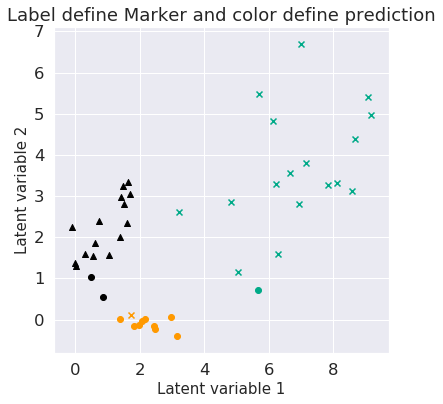

In [15]:
rd_basedOnAE = tf.keras.Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer("model_dense_2neurons").output)
X_ae = rd_basedOnAE.predict(X_scaled,batch_size=32)

X_train, X_test, y_train, y_test = train_test_split(X_ae, y, test_size=0.25, random_state=RANDOM_STATE)

rfc = RandomForestClassifier(n_estimators=15, max_depth=5, criterion='gini', random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc = accuracy_score(y_pred,y_test)
print('Accuracy for a classifier using the reduced dataset: ', acc)

# Plot results

markers = ['^', 'x', 'o', 's']
marker_label = [markers[i] for i in y_test]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y_pred)))]
color_pred = [colors[i] for i in y_pred]

plt.figure(figsize=(6,6))
for i in range(len(y_test)):   
    plt.scatter(X_test[i,0], X_test[i,1], marker=marker_label[i], color=color_pred[i]) 
plt.title('Label define Marker and color define prediction')
plt.xlabel('Latent variable 1', size=15)
plt.ylabel('Latent variable 2', size=15)
plt.grid(True)